In [36]:
import numdifftools as nd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy

def f(x):
    #return 30 * x[0] - (2 * x[0] ** 2)         
    return x[0] ** 2 + x[1] ** 2
def f2(x): #Função de exemplo do livro Programação Nao Linear
    return 30 * x[0] - (2 * x[0] ** 2)
#Teste 
x = np.array([100,100])
print(nd.Gradient(f)(x))

[200. 200.]


In [37]:
def g_descendent(x0, alpha, f, r):
    precisão = 0.0001 #Condição de parada
    max_iterações = 100000
    x_novo = x0
    res = []
    for i in range(max_iterações):
        x_ant = x_novo
        if r == "max": #Para maximização, fazemos o gradiente positivo
            #F(x+1) = F(x) + alpha * gradiente(F(x)
            x_novo = x_ant + alpha * nd.Gradient(f)(x_ant)
        if r == "min": #Para minimização, fazemos o gradiente negativo
            #F(x+1) = F(x) - alpha * gradiente(F(x)
            x_novo = x_ant - alpha * nd.Gradient(f)(x_ant)
        #Verificando se a imagem da função está convergindo
        f_x_novo = f(x_novo) #F(x+1)
        f_x_ant = f(x_ant) #F(x)
        res.append([x_novo, f_x_novo]) #Salvando os valores de x e f(x)
        if abs(f_x_novo - f_x_ant) < precisão: #Condição de parada
            print("Convergiu")
            return res, x_novo, f_x_novo
    print("Número de iterações maxima")
    return res, x_novo, f_x_novo
res,x ,fx = g_descendent(x, 0.001, f, "min")
print("x = ", x)
print("f(x) = ", fx)

Convergiu
x =  [0.11151113 0.11151113]
f(x) =  0.02486946367158437


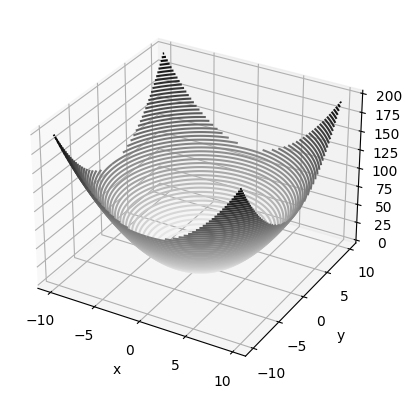

[[array([99.8, 99.8]), 19920.079999999994], [array([99.6004, 99.6004]), 19840.47936031999], [array([99.4011992, 99.4011992]), 19761.196804796153], [array([99.2023968, 99.2023968]), 19682.23106236419], [array([99.00399201, 99.00399201]), 19603.58086703898], [array([98.80598402, 98.80598402]), 19525.244957894298], [array([98.60837206, 98.60837206]), 19447.22207904255], [array([98.41115531, 98.41115531]), 19369.510979614693], [array([98.214333, 98.214333]), 19292.110413740153], [array([98.01790434, 98.01790434]), 19215.01914052685], [array([97.82186853, 97.82186853]), 19138.235924041306], [array([97.62622479, 97.62622479]), 19061.759533288838], [array([97.43097234, 97.43097234]), 18985.588742193813], [array([97.2361104, 97.2361104]), 18909.722329580007], [array([97.04163817, 97.04163817]), 18834.159079151003], [array([96.8475549, 96.8475549]), 18758.897779470713], [array([96.65385979, 96.65385979]), 18683.93722394395], [array([96.46055207, 96.46055207]), 18609.276210797074], [array([96.26

In [38]:
def plot2():
    x = np.arange(-10, 10, 0.1)
    y = np.arange(-10, 10, 0.1)
    X, Y = np.meshgrid(x, y)
    Z = X ** 2 + Y ** 2
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

plot2()
print(res)


In [39]:
def tratarRes(res):
    x = []
    y = []
    z = []
    for i in range(len(res)):
        x.append(res[i][0][0])
        y.append(res[i][0][1])
        z.append(res[i][1])
    return x, y, z
X,Y,Z= tratarRes(res)
print(X)
print(Y)
print(Z)

[99.79999999999998, 99.60039999999998, 99.40119919999998, 99.20239680159999, 99.00399200799679, 98.8059840239808, 98.60837205593283, 98.41115531182096, 98.21433300119732, 98.01790433519493, 97.82186852652454, 97.6262247894715, 97.43097233989255, 97.23611039521276, 97.04163817442233, 96.84755489807348, 96.65385978827734, 96.46055206870079, 96.2676309645634, 96.07509570263427, 95.88294551122901, 95.69117962020655, 95.49979726096615, 95.30879766644422, 95.11818007111134, 94.92794371096912, 94.73808782354718, 94.54861164790009, 94.35951442460428, 94.17079539575508, 93.98245380496357, 93.79448889735365, 93.60689991955893, 93.41968611971981, 93.23284674748037, 93.0463810539854, 92.86028829187742, 92.67456771529368, 92.48921857986309, 92.30424014270336, 92.11963166241797, 91.93539239909313, 91.75152161429465, 91.56801857106606, 91.38488253392393, 91.20211276885603, 91.01970854331832, 90.83766912623169, 90.65599378797921, 90.47468180040326, 90.29373243680246, 90.11314497192885, 89.932918681985

In [60]:
x2 = np.array([-100,-100])
res2, xf2, fx2 = g_descendent(x2, 0.001, f, "min")
X2, Y2, Z2 = tratarRes(res2)



Convergiu


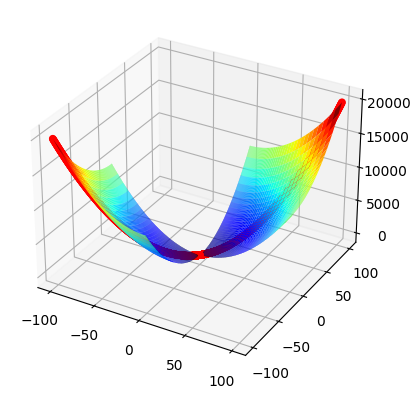

In [63]:
#Plotar a linha de descida do gradiente em 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot3(x,y,z,x2,y2,z2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(x, y)
    Z = X ** 2 + Y ** 2
    ax.plot_surface(X, Y, Z, rcount=100, ccount=100, cmap='jet', edgecolor='none')
    Xx, Yy = np.meshgrid(x2, y2)
    Zz = Xx ** 2 + Yy ** 2
    ax.plot_surface(Xx, Yy, Zz, rcount=100, ccount=100, cmap='jet', edgecolor='none')
    ax.scatter(x, y, z, c='r', marker='o')
    ax.scatter(X2, Y2, Z2, c='r', marker='o')
plot3(X,Y,Z,X2,Y2, Z2)


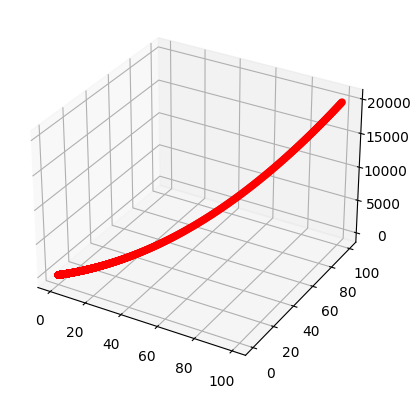

In [42]:
def scatterplot(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='r', marker='o')
scatterplot(X,Y,Z)
    

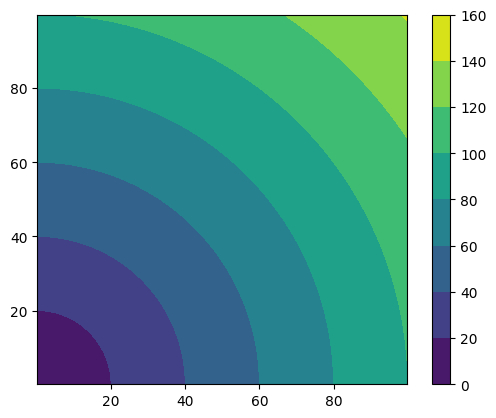

In [43]:
def meshgridplot(x,y,z): 
    xx, yy = np.meshgrid(x, y)
    zz = np.sqrt(xx ** 2 + yy ** 2)
    fig = plt.figure()
    xs, ys = np.meshgrid(x, y, sparse=True)
    zs = np.sqrt(xs ** 2 + ys ** 2)
    h = plt.contourf(xx,yy,zs)
    plt.axis('scaled')
    plt.colorbar(h)
    plt.show()
meshgridplot(X,Y,Z)

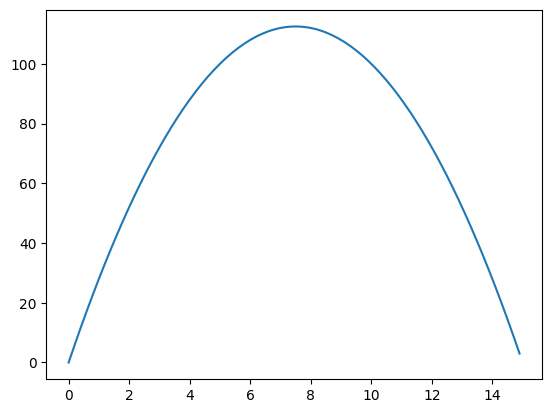

In [44]:
import matplotlib.pyplot as plt

#Plot do exemplo da nota de Programação Nao Linear
def plotar_grafico():
    x = np.arange(0, 15, 0.1)
    y = 30 * x - (2 * x ** 2)
    plt.plot(x, y)

plotar_grafico()
plt.show()

Convergiu
Convergiu


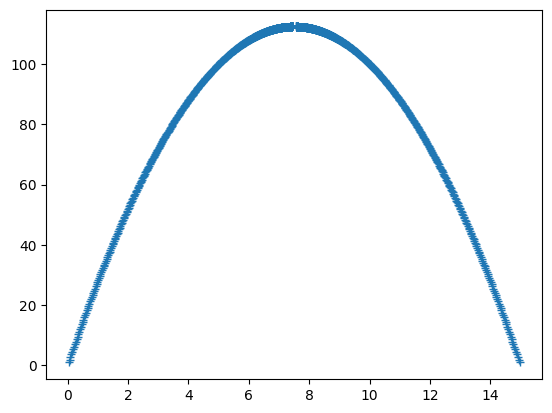

In [45]:

x = np.array([15])
res = g_descendent(x, 0.001, f2, "max")
x2 = np.array([0])
res2 = g_descendent(x2, 0.001, f2, "max")
def plot_grad_f2():
    x = []
    y = []
    for i in range(len(res[0])):
        x.append(res[0][i][0])
        x.append(res2[0][i][0])
        y.append(res[0][i][1])
        y.append(res2[0][i][1])
    plt.plot(x, y, '+')
    plt.show()
plot_grad_f2()


In [46]:
def rosenbrock_2d(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2
x = np.array([100,100])
res, x, fx = g_descendent(x, 0.1, rosenbrock_2d, "min")
print("x = ", x)
print("f(x) = ", fx)
print(res)



Convergiu
x =  [2.48395034e+24 1.98100000e+05]
f(x) =  3.806901493380211e+99
[[array([-39599919.79999972,    198099.99999987]), 2.459105863636318e+32], [array([2.48395034e+24, 1.98100000e+05]), 3.806901493380211e+99], [array([2.48395034e+24, 1.98100000e+05]), 3.806901493380211e+99]]


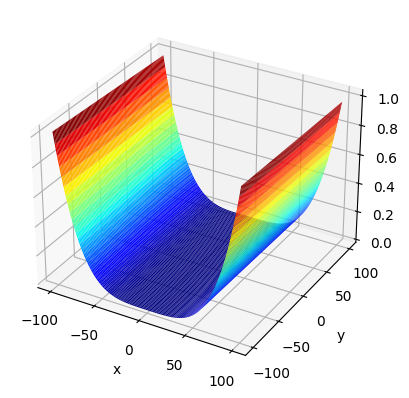

In [47]:
def plotar_rosenbrock():
    x = np.arange(-100, 100, 0.1)
    y = np.arange(-100, 100, 0.1)
    X, Y = np.meshgrid(x, y)
    Z = 100 * (Y - X ** 2) ** 2 + (1 - X) ** 2
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rcount=100, ccount=100, cmap='jet', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()
plotar_rosenbrock()


In [48]:
#Fazer o teste da primeira derivada
x , y = sy.symbols('x y')
rose = 100 * (y - x ** 2) ** 2 + (1 - x) ** 2
dx = rose.diff(x)
dy = rose.diff(y)
print(dx)
print(dy)
dx = dx.diff(x)
dy = dy.diff(y)   
print(dx)
print(dy)
dx = dx.diff(x)
print(dx)

-400*x*(-x**2 + y) + 2*x - 2
-200*x**2 + 200*y
1200*x**2 - 400*y + 2
200
2400*x
